In [60]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import sklearn

In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [62]:
df=pd.read_csv('Avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [63]:
df.shape

(18249, 14)

In [64]:
df.drop(["Unnamed: 0","Date"],axis=1,inplace=True)

The above two columns are dropped as they does not have any impact on the analysis

**Exploratory Data Analysis**

In [65]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(2)
memory usage: 1.7+ MB


By seeing the above information we can see year is in "int" we should convert into object

In [67]:
df['year']=df['year'].astype('object')

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  object 
 11  region        18249 non-null  object 
dtypes: float64(9), object(3)
memory usage: 1.7+ MB


***Check for duplicates***

In [69]:
df.drop_duplicates(inplace=True)

In [70]:
df.shape 

(18249, 12)

There is no change in shape so there are no duplicates

***Check for null values***

In [71]:
df.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

There are no null values

***Separate categorical and numerical column***

In [72]:
categorical_cols=[]
numerical_cols=[]
for x in df.columns:
    if df.dtypes[x]== 'object' :
        categorical_cols.append(x)
    elif df.dtypes[x]=='float64' or df.dtypes[x]=='int64':
        numerical_cols.append(x)

You can see the above plots there is skewness in every columns except "Average price" in the above data

***check for outliers***

AveragePrice        Axes(0.125,0.77;0.227941x0.11)
Total Volume     Axes(0.398529,0.77;0.227941x0.11)
4046             Axes(0.672059,0.77;0.227941x0.11)
4225               Axes(0.125,0.638;0.227941x0.11)
4770            Axes(0.398529,0.638;0.227941x0.11)
Total Bags      Axes(0.672059,0.638;0.227941x0.11)
Small Bags         Axes(0.125,0.506;0.227941x0.11)
Large Bags      Axes(0.398529,0.506;0.227941x0.11)
XLarge Bags     Axes(0.672059,0.506;0.227941x0.11)
dtype: object

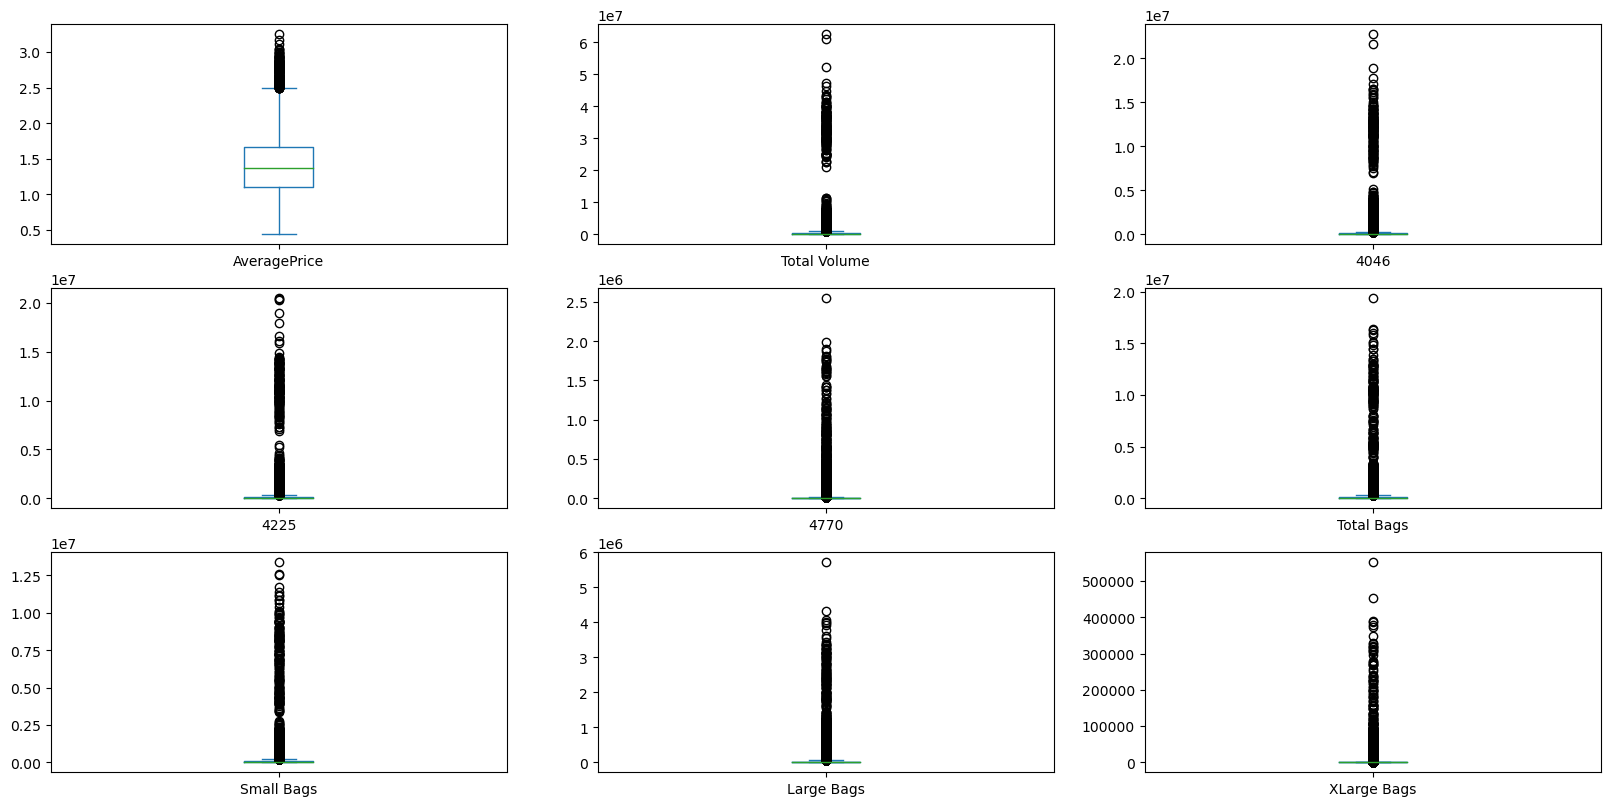

In [73]:
df.plot(kind='box',subplots=True,layout=(6,3),figsize=(20,20))

In [74]:
for i in numerical_cols:
    IQR=df[i].quantile(0.75)-df[i].quantile(0.25)

    Q1=df[i].quantile(0.25)

    Q2=df[i].quantile(0.75)

    lowl=Q1-1.5*IQR
    print(lowl)
    upperl=Q2+1.5*IQR
    print(upperl)
    
    new_df=df[i].copy()
    
    new_df=np.where(new_df > upperl , upperl ,
                           np.where(new_df <lowl, lowl ,new_df
                                   )
                           )
    df[i]=new_df

0.26000000000000034
2.4999999999999996
-622346.985
1066147.855
-164395.12499999997
276269.39499999996
-217788.34
371003.98
-9365.130000000001
15608.550000000001
-153453.455
269325.46499999997
-117882.955
204070.04499999998
-32725.199999999997
54881.92
-198.75
331.25


AveragePrice        Axes(0.125,0.77;0.227941x0.11)
Total Volume     Axes(0.398529,0.77;0.227941x0.11)
4046             Axes(0.672059,0.77;0.227941x0.11)
4225               Axes(0.125,0.638;0.227941x0.11)
4770            Axes(0.398529,0.638;0.227941x0.11)
Total Bags      Axes(0.672059,0.638;0.227941x0.11)
Small Bags         Axes(0.125,0.506;0.227941x0.11)
Large Bags      Axes(0.398529,0.506;0.227941x0.11)
XLarge Bags     Axes(0.672059,0.506;0.227941x0.11)
dtype: object

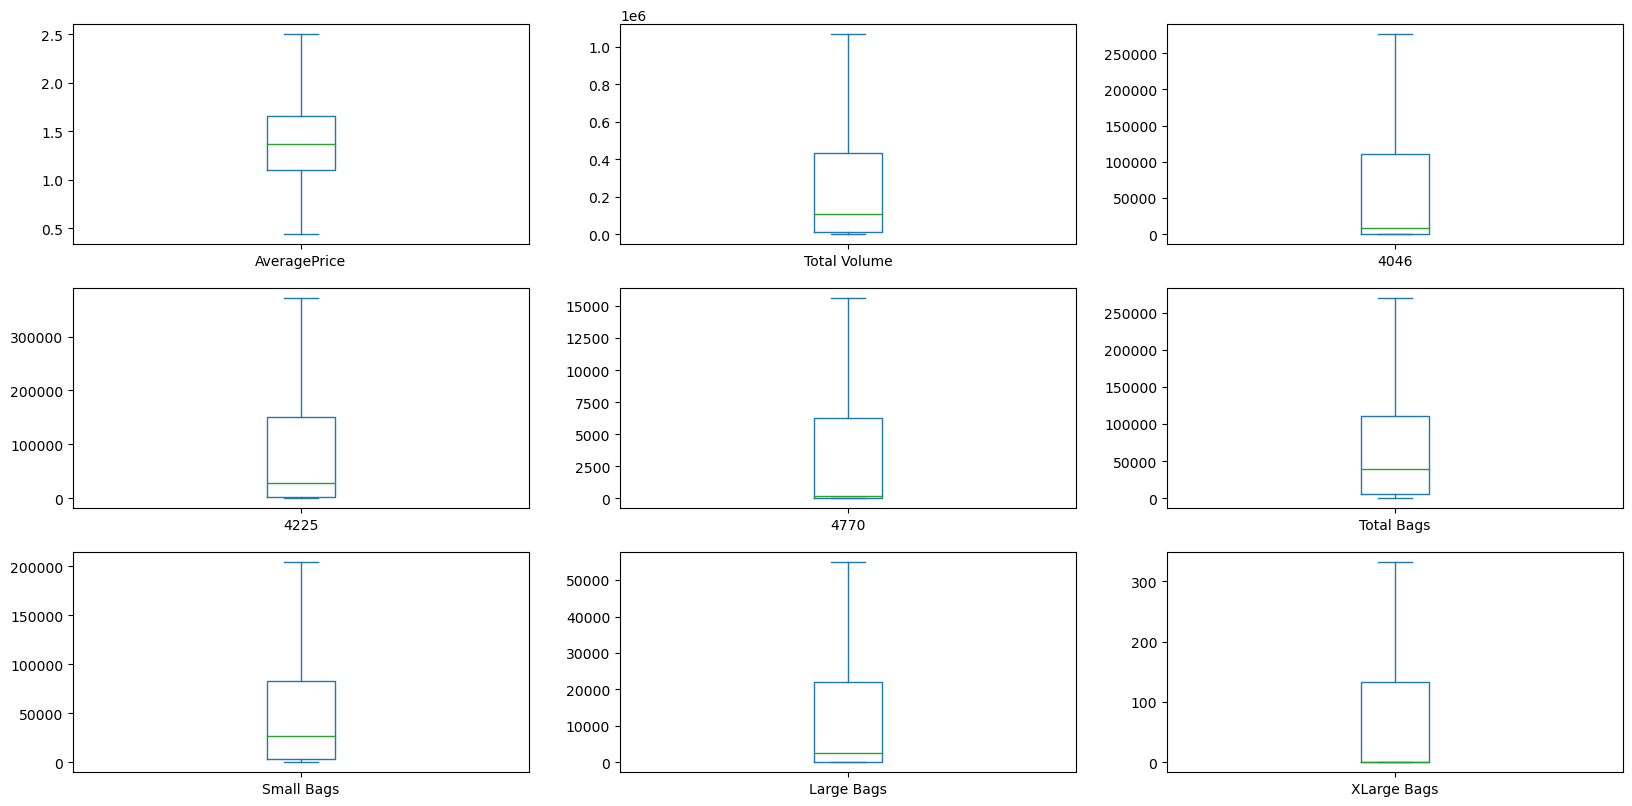

In [75]:
df.plot(kind='box',subplots=True,layout=(6,3),figsize=(20,20))

So the outliers which are present in some of the features are also removed

***check for skewness***

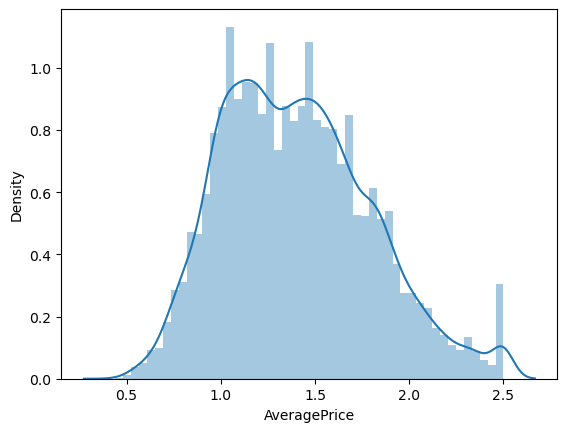

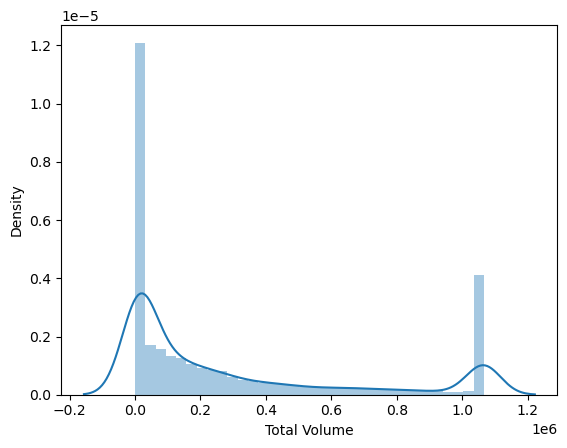

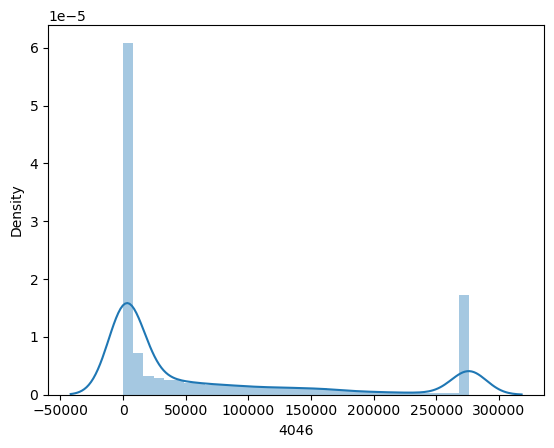

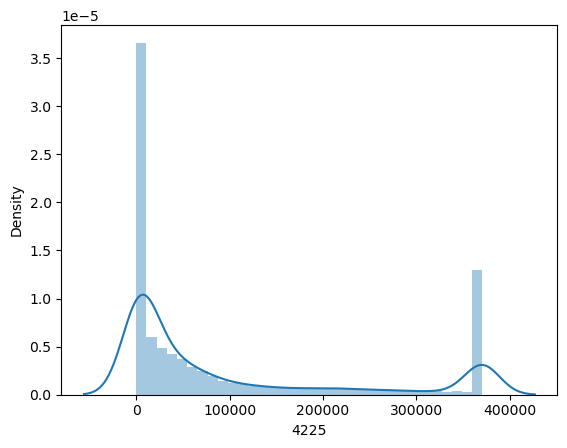

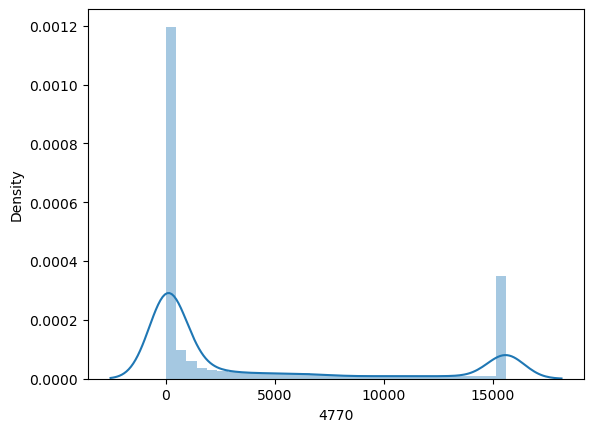

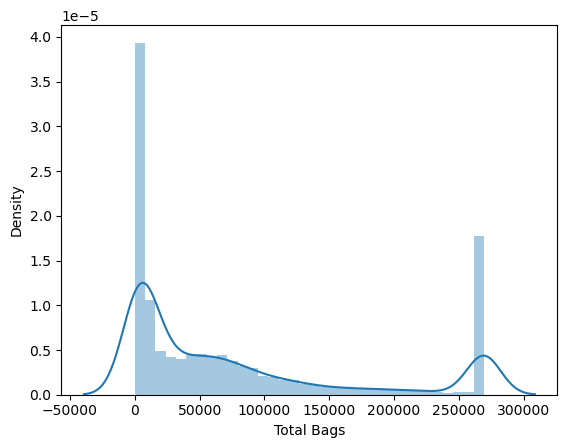

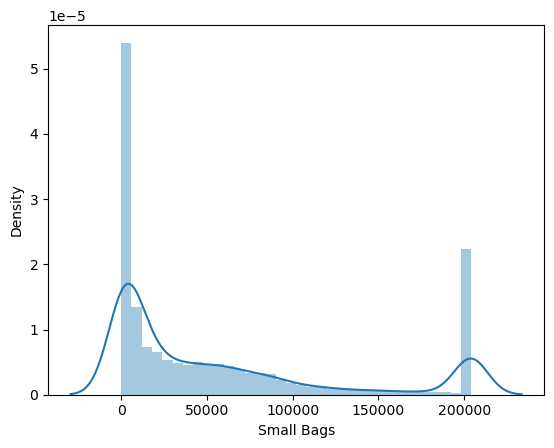

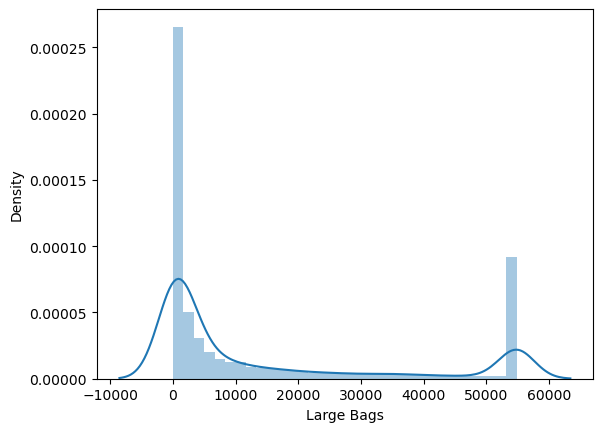

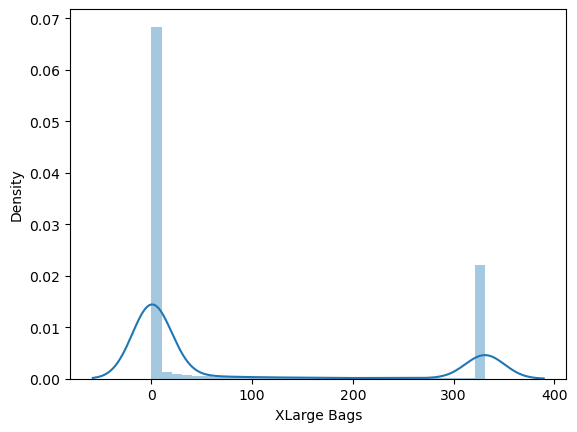

In [76]:
for i in numerical_cols:
    sns.distplot(df[i],kde=True)
    plt.show()

Transformation to get rid of skewness

In [77]:
for i in numerical_cols:
    df[i] = np.sqrt(df[i])

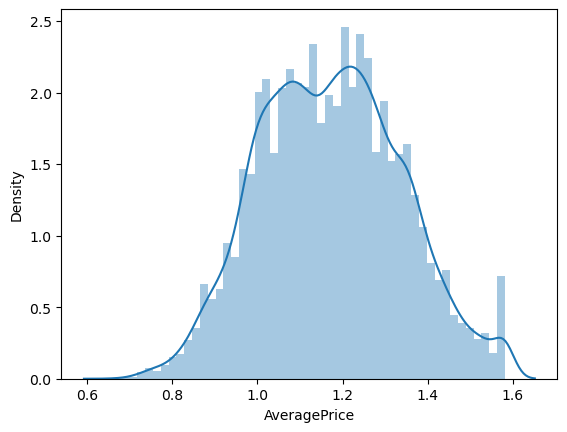

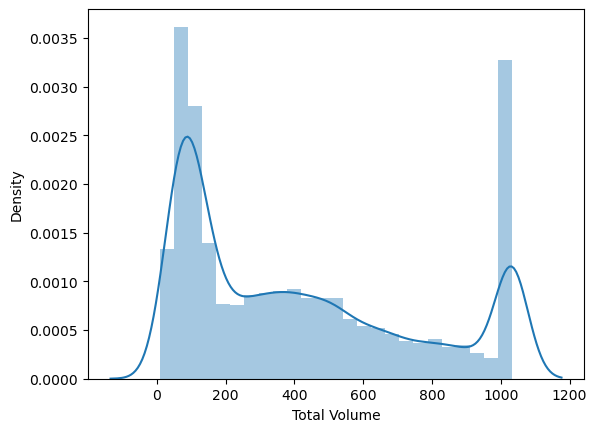

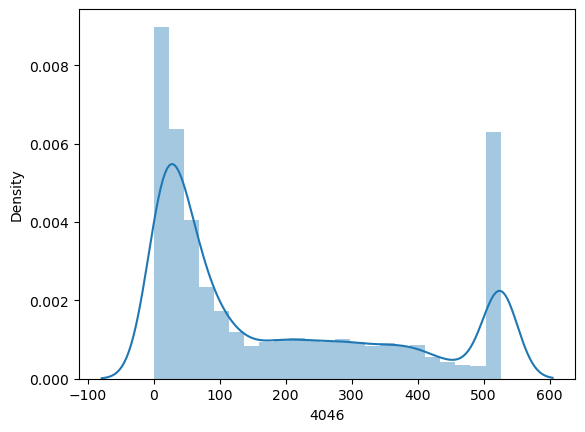

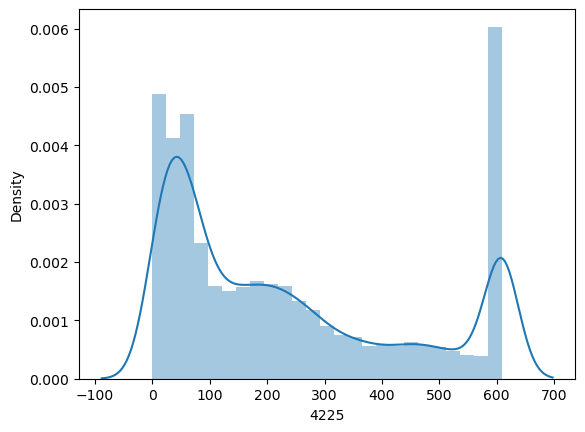

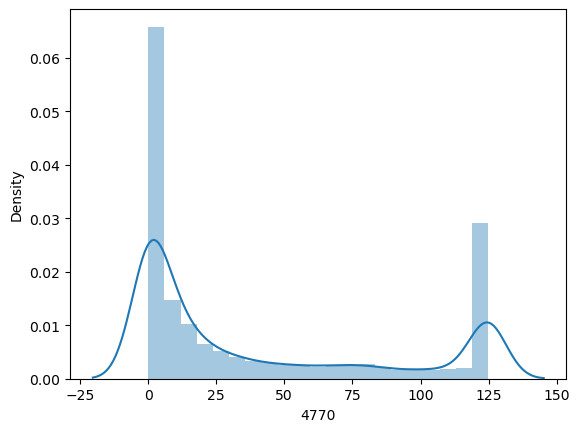

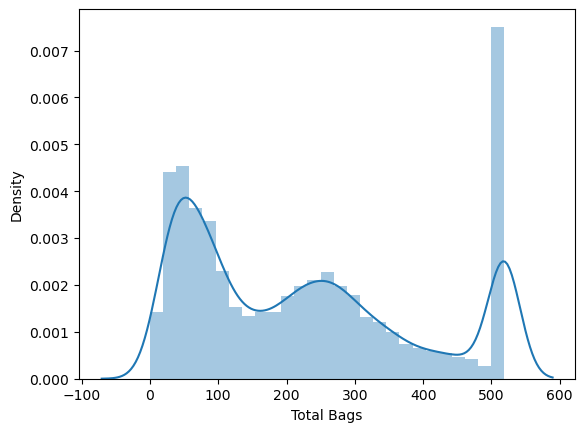

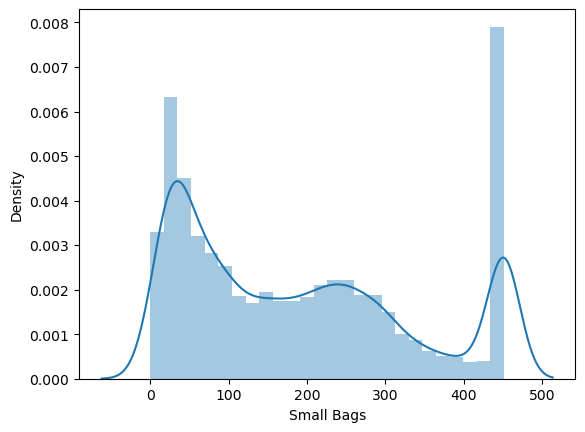

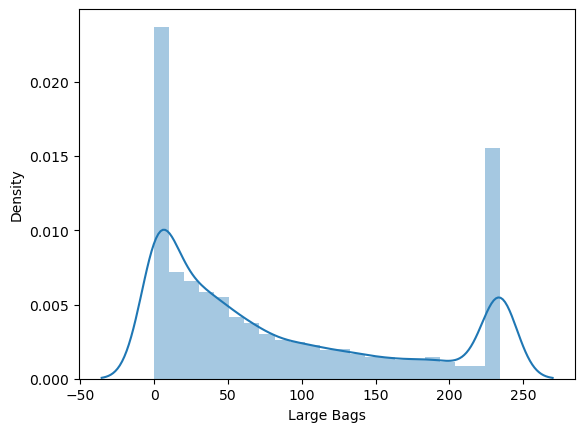

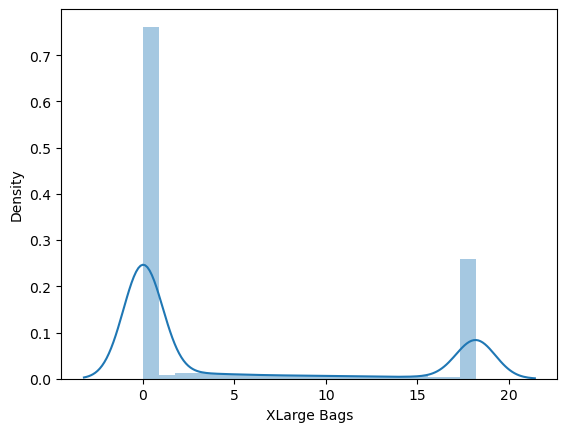

In [78]:
for i in numerical_cols:
    sns.distplot(df[i],kde=True)
    plt.show()

Skewness is managed

***Encoding of categorical column***

As the catrgorical data is nominal we can use nominal encoding

In [79]:
from sklearn.preprocessing import LabelEncoder

In [80]:
le=LabelEncoder()

In [81]:
for i in df[categorical_cols]:
    df[i]=le.fit_transform(df[i])
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.153256,253.449443,32.198447,233.355630,6.939741,93.257010,92.755701,9.656604,0.0,0,0,0
1,1.161895,234.258362,25.966902,211.278986,7.637408,97.496461,96.995206,9.873702,0.0,0,0,0
2,0.964365,343.831674,28.190424,330.378071,11.423660,90.251593,89.678370,10.155787,0.0,0,0,0
3,1.039230,281.055422,33.645208,268.284196,8.519390,76.230965,75.348524,11.565466,0.0,0,0,0
4,1.131371,225.919455,30.683546,209.376193,8.705171,78.638095,77.370925,14.060228,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.276715,130.670693,45.243342,39.104987,0.000000,116.183777,114.310192,20.781001,0.0,1,3,53
18245,1.307670,117.847529,34.521008,58.579006,0.000000,96.254039,94.551785,18.022209,0.0,1,3,53
18246,1.367479,117.331837,34.524194,49.525650,26.980363,96.923217,96.704705,6.504614,0.0,1,3,53
18247,1.389244,127.299725,39.084908,54.598901,26.963123,104.735572,104.496603,7.071068,0.0,1,3,53


***Check for Correlation between feautures***

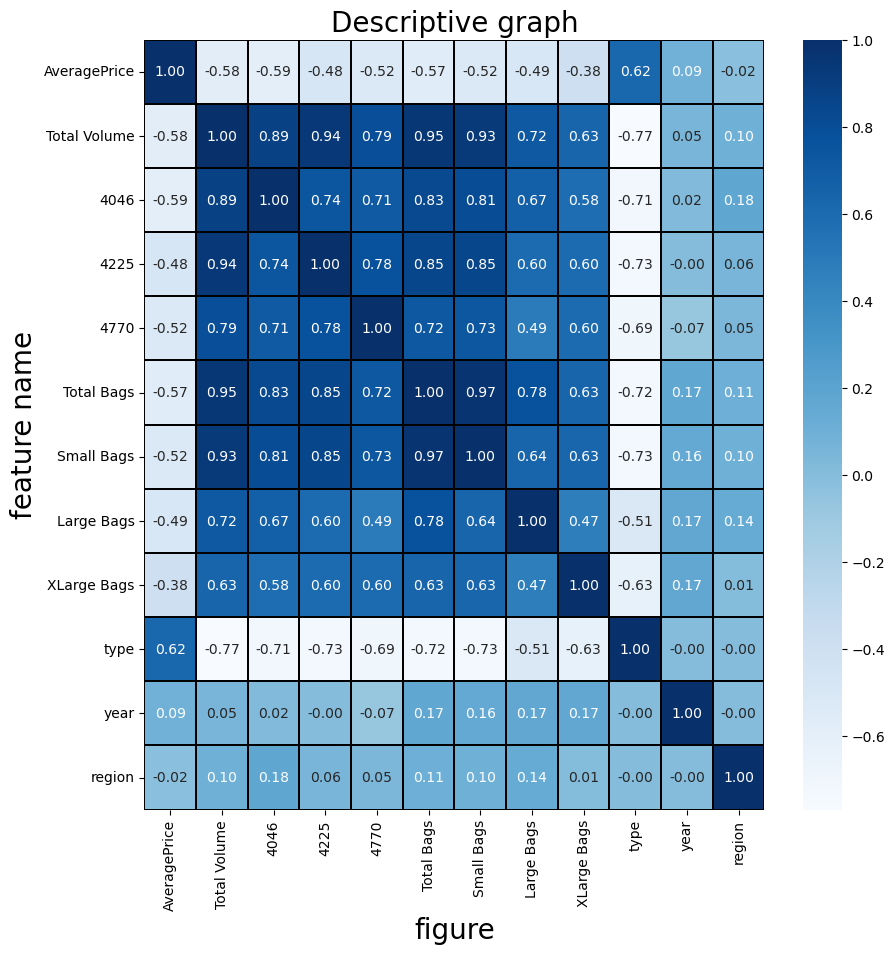

In [82]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Blues')
plt.xlabel('figure',fontsize=20)
plt.ylabel('feature name',fontsize=20)
plt.title('Descriptive graph',fontsize=20)
plt.show()

We can see most of the features are highly correlated with each other so some features must be dropped to prevent overfitting

In [83]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range (len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [84]:
corr_features=correlation(df,0.9)

In [85]:
print(corr_features)

{'Small Bags', '4225', 'Total Bags'}


In [86]:
df_new=df.drop(['4225','Small Bags','Total Bags'],axis=1)

In [87]:
df_new.head()

,AveragePrice,Total Volume,4046,4770,Large Bags,XLarge Bags,type,year,region
0,1.153256,253.449443,32.198447,6.939741,9.656604,0.0,0,0,0
1,1.161895,234.258362,25.966902,7.637408,9.873702,0.0,0,0,0
2,0.964365,343.831674,28.190424,11.423660,10.155787,0.0,0,0,0
3,1.039230,281.055422,33.645208,8.519390,11.565466,0.0,0,0,0
4,1.131371,225.919455,30.683546,8.705171,14.060228,0.0,0,0,0


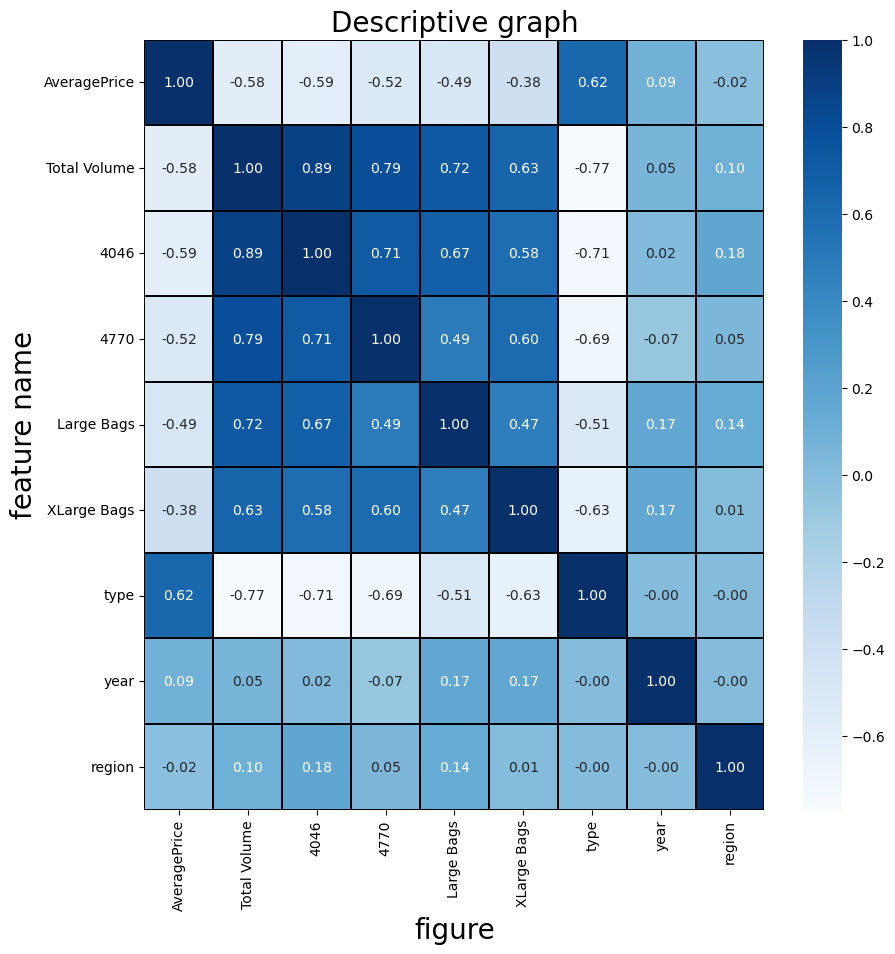

In [88]:
plt.figure(figsize=(10,10))
sns.heatmap(df_new.corr(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Blues')
plt.xlabel('figure',fontsize=20)
plt.ylabel('feature name',fontsize=20)
plt.title('Descriptive graph',fontsize=20)
plt.show()

So correlation between features are rectified

***REGRESSION MODEL***

***check of correlation with the features with the target***

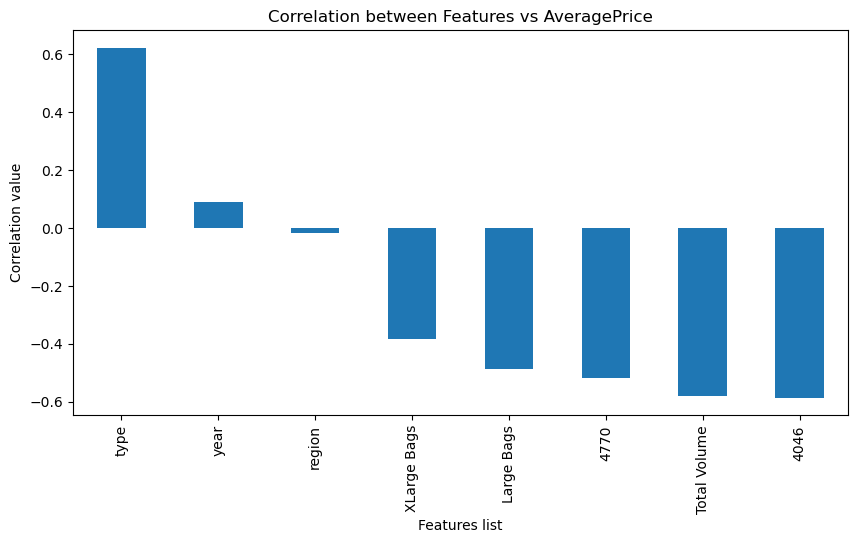

In [89]:
df_corr=df_new.corr()
plt.figure(figsize=(10,5))
df_corr['AveragePrice'].sort_values(ascending=False).drop('AveragePrice').plot.bar()
plt.title("Correlation between Features vs AveragePrice")
plt.xlabel('Features list')
plt.ylabel('Correlation value')
plt.show()

In [90]:
df1=df_new.drop(['region','year'],axis=1)

***Splitting of data into features and target***

In [91]:
x=df1.drop('AveragePrice',axis=1)
y=df1['AveragePrice']

***Scaling or standardization of parameters***

In [92]:
scaler=StandardScaler()
X=scaler.fit_transform(x)
X

array([[-0.47664994, -0.82216064, -0.68903109, -0.89057982, -0.64505504,
        -0.99983562],
       [-0.53298091, -0.85548924, -0.67452905, -0.88800816, -0.64505504,
        -0.99983562],
       [-0.21135385, -0.84359703, -0.59582622, -0.88466671, -0.64505504,
        -0.99983562],
       ...,
       [-0.87619162, -0.80972169, -0.27245721, -0.92791702, -0.64505504,
         1.00016441],
       [-0.8469332 , -0.78532932, -0.27281557, -0.92120704, -0.64505504,
         1.00016441],
       [-0.83240817, -0.70661119, -0.52181254, -0.94455551, -0.64505504,
         1.00016441]])

***Find the best random score***

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [94]:
lr=LinearRegression()
maxAcc=0
rs=0
for i in range(200):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    ac=r2_score(y_test,pred)
    if ac>maxAcc:
        maxAcc=ac
        rs=i
        
print("Best score ",maxAcc)
print("random state ",rs)

Best score  0.48307613889991663
random state  113


In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge

In [96]:
def Regression(lr,x,y):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=113)
    lr.fit(x_train,y_train)
    pred_test=lr.predict(x_test)
    pred_train=lr.predict(x_train)
    print("R2 score for test data:",r2_score(y_test,pred_test))
    print("R2 score train data :",r2_score(y_train,pred_train)*100)
    print("Mean absolute error:",mean_absolute_error(y_test,pred_test))
    print("Mean squared error:",mean_squared_error(y_test,pred_test))
    print("Root Mean squared error:",np.sqrt(mean_absolute_error(y_test,pred_test)))

In [97]:
lr=LinearRegression()
Regression(lr,x,y)

R2 score for test data: 0.48307613889991663
R2 score train data : 43.819223955756314
Mean absolute error: 0.09421528061496891
Mean squared error: 0.014424870246203304
Root Mean squared error: 0.3069450775219712


In [98]:
lr=RandomForestRegressor()
Regression(lr,x,y)

R2 score for test data: 0.6666450237964403
R2 score train data : 93.33579623354476
Mean absolute error: 0.07020824923532115
Mean squared error: 0.009302341484932013
Root Mean squared error: 0.26496839289870244


In [99]:
lr=DecisionTreeRegressor()
Regression(lr,x,y)

R2 score for test data: 0.4244627927804605
R2 score train data : 97.8403570244055
Mean absolute error: 0.08939245123605313
Mean squared error: 0.01606048813133951
Root Mean squared error: 0.29898570406635355


In [100]:
lr=KNN()
Regression(lr,x,y)

R2 score for test data: 0.6350189014005714
R2 score train data : 75.69829348098855
Mean absolute error: 0.07381504558016075
Mean squared error: 0.010184875154358865
Root Mean squared error: 0.2716892445058522


In [101]:
lr=Ridge()
Regression(lr,x,y)

R2 score for test data: 0.48307275467062605
R2 score train data : 43.819223013136465
Mean absolute error: 0.09421573166864768
Mean squared error: 0.014424964683841175
Root Mean squared error: 0.3069458122676504


In [102]:
lr=Lasso()
Regression(lr,x,y)

R2 score for test data: -0.00013683704534539487
R2 score train data : 0.0
Mean absolute error: 0.13750929989281402
Mean squared error: 0.02790903107495372
Root Mean squared error: 0.3708224641156655


Out of these the linear regression is giving good results

***Hyperparameter tuning for regression***

In [103]:
from sklearn.model_selection import GridSearchCV

In [104]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=113)

model = LinearRegression()
param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

best_model = grid_search.best_estimator_
test_score = best_model.score(x_test, y_test)
print("Test Set Score:", test_score)

Best Parameters: {'fit_intercept': True, 'positive': True}
Best Score: nan
Test Set Score: 0.42219061750299813


In [105]:
best_model = LinearRegression(fit_intercept=True,positive=True)

best_model.fit(x_train, y_train)

y_pred = best_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Test MSE:", mse)

Test MSE: 0.016123893665539988


***saving the model***

In [106]:
import joblib

joblib.dump(best_model, 'Avocadoregression.joblib')

['Avocadoregression.joblib']

In [107]:
loaded_model = joblib.load('Baseball.joblib')

***CLASSIFICATION***

***Checking of correlation with the target***

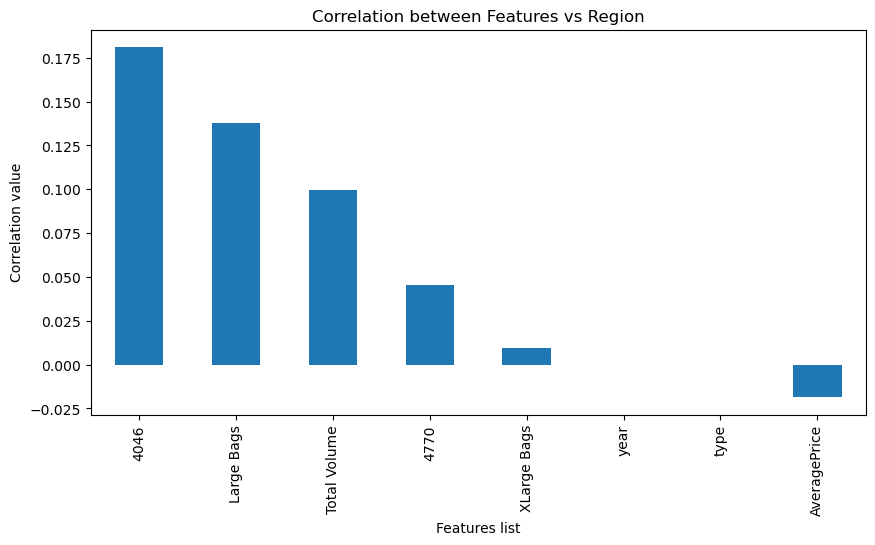

In [108]:
df_corr=df_new.corr()
plt.figure(figsize=(10,5))
df_corr['region'].sort_values(ascending=False).drop('region').plot.bar()
plt.title("Correlation between Features vs Region")
plt.xlabel('Features list')
plt.ylabel('Correlation value')
plt.show()

In [109]:
df2=df_new.drop(['year','type'],axis=1)

In [120]:
df2

,AveragePrice,Total Volume,4046,4770,Large Bags,XLarge Bags,region
0,1.153256,253.449443,32.198447,6.939741,9.656604,0.0,0
1,1.161895,234.258362,25.966902,7.637408,9.873702,0.0,0
2,0.964365,343.831674,28.190424,11.423660,10.155787,0.0,0
3,1.039230,281.055422,33.645208,8.519390,11.565466,0.0,0
4,1.131371,225.919455,30.683546,8.705171,14.060228,0.0,0
...,...,...,...,...,...,...,...
18244,1.276715,130.670693,45.243342,0.000000,20.781001,0.0,53
18245,1.307670,117.847529,34.521008,0.000000,18.022209,0.0,53
18246,1.367479,117.331837,34.524194,26.980363,6.504614,0.0,53
18247,1.389244,127.299725,39.084908,26.963123,7.071068,0.0,53


***Splitting of data into features and target***

In [110]:
x1=df2.drop('region',axis=1)
y1=df2['region']

***Scaling or standardization of parameters***

In [111]:
scaler=StandardScaler()
X1=scaler.fit_transform(x1)
X1

array([[-0.11867225, -0.47664994, -0.82216064, -0.68903109, -0.89057982,
        -0.64505504],
       [-0.06677834, -0.53298091, -0.85548924, -0.67452905, -0.88800816,
        -0.64505504],
       [-1.25336267, -0.21135385, -0.84359703, -0.59582622, -0.88466671,
        -0.64505504],
       ...,
       [ 1.16819028, -0.87619162, -0.80972169, -0.27245721, -0.92791702,
        -0.64505504],
       [ 1.29893486, -0.8469332 , -0.78532932, -0.27281557, -0.92120704,
        -0.64505504],
       [ 0.59939353, -0.83240817, -0.70661119, -0.52181254, -0.94455551,
        -0.64505504]])

Completed